# Task I: Quantum Computing Part 

## Quantum circuit with PennyLane

- With 5 qubits 
- Apply Hadamard operation on every qubit 
- Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
- SWAP (0, 4) 
- Rotate X with pi/2 on any qubit 
- Plot the circuit 

In [80]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [99]:
n = 5  # Number of qubits

# Define a device
dev = qml.device('default.qubit', wires = n)

# construct the qnode
# We apply RX gate on first qubit
# The circuit measures the probablities on every qubit
@qml.qnode(dev)
def circuit(theta):
    for i in range(n):
        qml.Hadamard(i)
    for i in range(n-1):
        qml.CNOT((i,i+1))
    qml.SWAP((0,4))
    qml.RX(theta, 0)
    return qml.probs(wires = range(n))

In [100]:
print(qml.draw(circuit)(np.pi/2))

0: ──H─╭●──────────╭SWAP──RX(1.57)─┤ ╭Probs
1: ──H─╰X─╭●───────│───────────────┤ ├Probs
2: ──H────╰X─╭●────│───────────────┤ ├Probs
3: ──H───────╰X─╭●─│───────────────┤ ├Probs
4: ──H──────────╰X─╰SWAP───────────┤ ╰Probs


In [101]:
circuit(np.pi/2)

tensor([0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
        0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
        0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
        0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
        0.03125, 0.03125, 0.03125, 0.03125], requires_grad=True)

## Swap Test based circuit

- Apply a Hadmard gate to the first qubit
- rotate the second qubit by pi/3 around X
- Apply Hadamard gate to the third and fourth qubit
- Perform a swap test between the states of the first and second qubit $|q_1 q_2>$ and the third and fourth qubit $|q_3 q_4>$


In [72]:
n = 5  # Number of qubits

# Define a device
dev = qml.device('default.qubit', wires = n)

# construct the qnode
# The circuit measures the probablities on last qubit
@qml.qnode(dev)
def circuit(theta):
    qml.Hadamard(0)
    qml.RZ(theta, 1)
    qml.Hadamard(2)
    qml.Hadamard(3)
    
    # SWAP Test
    qml.Hadamard(4)
    qml.CSWAP((4,0,1))
    qml.CSWAP((4,2,3))
    qml.Hadamard(4)
    
    return qml.probs(wires = n-1)

In [73]:
print(qml.draw(circuit)(np.pi/3))

0: ──H────────╭SWAP──────────┤       
1: ──RZ(1.05)─├SWAP──────────┤       
2: ──H────────│─────╭SWAP────┤       
3: ──H────────│─────├SWAP────┤       
4: ──H────────╰●────╰●─────H─┤  Probs


In [74]:
print(circuit(np.pi/3))

[0.75 0.25]


$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$


consider four states: $\ket{a_0}, \ket{a_1}, \ket{a_2}, \ket{a_3}$ which represents the states of first 4 qubits after application of $H$, $R_y$, $H$, $H$ gates respectively. The state of the system at the beginning of the protocol is $\ket{0,a_3,a_2,a_1,a_0}$. After the hadamard gate on the last qubit, the state of the system is 

\begin{align}
    \frac{1}{\sqrt{2}} \left( \ket{0,a_3,a_2,a_1,a_0} + \ket{1,a_3,a_2,a_1,a_0} \right)
\end{align}

The controlled SWAP gates transforms the state into

\begin{align}
    \frac{1}{\sqrt{2}} \left( \ket{0,a_3,a_2,a_1,a_0} + \ket{1,a_2,a_3,a_0,a_1} \right)
\end{align}

The second Hadamard gate results in

\begin{align}
    \frac{1}{2} \left( \ket{0,a_3,a_2,a_1,a_0} + \ket{1,a_3,a_2,a_1,a_0} + \ket{0,a_2,a_3,a_0,a_1} - \ket{1,a_2,a_3,a_0,a_1} \right) \\
    =  \frac{1}{2} \left( \ket{0}(\ket{a_3,a_2,a_1,a_0} + \ket{a_2,a_3,a_0,a_1}) + \ket{1}\ket{a_3,a_2,a_1,a_0} +  - \ket{a_2,a_3,a_0,a_1}) \right)
\end{align}

The measurement gate on the last qubit ensures that it's 0 with a probability of

\begin{align}
P(last~qubit = 0) = \frac{1}{2} ( \bra{a_3,a_2,a_1,a_0} + \bra{a_2,a_3,a_0,a_1} ) \frac{1}{2} ( \ket{a_3,a_2,a_1,a_0} + \ket{a_2,a_3,a_0,a_1} ) \\
\end{align}

\begin{align}
P(last~qubit = 0) = \frac{1}{2} + \frac{1}{2} |\braket{a_3,a_2}{a_1,a_0}|^2
\end{align}

We know that
\begin{align}
\ket{a_0} = \ket{a_2} = \ket{a_3} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) \\
\ket{a_1} = cos(\frac{\theta}{2})\ket{0} -isin(\frac{\theta}{2})\ket{1}
\end{align}

Plugging in the values we get

\begin{align}
P(last~qubit = 0) = \frac{1}{2} + \frac{1}{2}.\frac{1}{2} = \frac{3}{4} = 0.75
\end{align}

Regardless the value of $\theta$ the probability of last qubit being in $\ket{0}$ is 0.75. This is because of the fact that in the norm squared we get $cos^2(\frac{\theta}{2}) + sin^2(\frac{\theta}{2} = 1$. This can also be verified from the plot below.

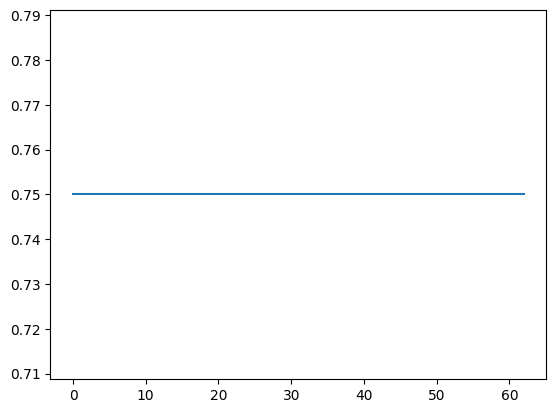

In [75]:
thetas = np.arange(0,2*np.pi, 0.1)
prob_0s = [circuit(theta)[0] for theta in thetas]

plt.plot(prob_0s)

If we change the $R_x$ gate to $R_y$ gate, we get the following equations

\begin{align}
\ket{a_1} = cos(\frac{\theta}{2})\ket{0} + sin(\frac{\theta}{2})\ket{1}
\end{align}

\begin{align}
P(last~qubit = 0) &= \frac{1}{2} + \frac{1}{2}.\frac{(cos(\frac{\theta}{2}) + sin(\frac{\theta}{2}))^2}{2} \\
P(last~qubit = 0) &= \frac{3 + sin(\theta)}{4}
\end{align}

The minimum valueof the above function is at $\theta = 3\pi/2$ which is 0.5 and the maximum value of the function is at $\theta  = \pi/2$ which is 1. This can also be verified from the plot below.

In [76]:
n = 5  # Number of qubits

# Define a device
dev = qml.device('default.qubit', wires = n)

# construct the qnode
# The circuit measures the probablities on last qubit
@qml.qnode(dev)
def circuit(theta):
    qml.Hadamard(0)
    qml.RY(theta, 1)
    qml.Hadamard(2)
    qml.Hadamard(3)
    
    # SWAP Test
    qml.Hadamard(4)
    qml.CSWAP((4,0,1))
    qml.CSWAP((4,2,3))
    qml.Hadamard(4)
    
    return qml.probs(wires = n-1)

In [77]:
print(qml.draw(circuit)(np.pi/3))

0: ──H────────╭SWAP──────────┤       
1: ──RY(1.05)─├SWAP──────────┤       
2: ──H────────│─────╭SWAP────┤       
3: ──H────────│─────├SWAP────┤       
4: ──H────────╰●────╰●─────H─┤  Probs


In [78]:
print(circuit(np.pi/3))

[0.96650635 0.03349365]


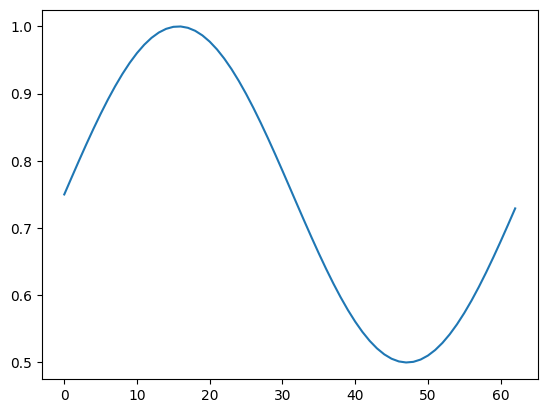

In [79]:
thetas = np.arange(0,2*np.pi, 0.1)
prob_0s = [circuit(theta)[0] for theta in thetas]

plt.plot(prob_0s)

Hence at $\theta = \pi/2$ we get the maximum fidelity i.e. 1. This is true because $R_y(\pi/2)$ is actually equal to hadamard gate with some global phase.